# Fairness Development Pipeline -  Demo

This notebook demonstrates the complete end-to-end fairness pipeline.

## Setup

In [20]:
import warnings
warnings.filterwarnings('ignore')

import sys
from pathlib import Path

# Dynamically add the project root to sys.path
# This assumes your notebook is inside a subfolder like 'pipeline_module'
# If your notebook is in the root, remove one .parent
project_root = Path.cwd().parent.parent 
sys.path.append(str(project_root))

# Verify the path (Optional)
print(f"Project root added to path: {project_root}")
print(f"shared folder exists: {(project_root / 'shared').exists()}")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


np.random.seed(42)
plt.style.use('ggplot')

print("✅ Setup complete!")

Project root added to path: d:\Research\Turing\TuringProject
shared folder exists: False
✅ Setup complete!


## Part 1: Generate Biased Dataset

We'll create a loan approval dataset with known biases:
- Representation bias (70% Male, 30% Female)
- Proxy variable (Income correlated with gender)
- Statistical disparity (Different feature distributions)
- Outcome bias (Different approval rates)

In [49]:
# Cell 1: Setup Path
import sys
from pathlib import Path

# Get the current notebook directory
notebook_dir = Path.cwd()

# If we are in the root folder, add it. 
# If we are inside a subfolder, go up one level.
if (notebook_dir / "pipeline_module").exists():
    project_root = notebook_dir
else:
    # Assuming notebook is in the root, try parent just in case
    project_root = notebook_dir.parent

# Add project root to sys.path
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print(f"✅ Project root set to: {project_root}")

✅ Project root set to: d:\Research\Turing\TuringProject\fairness_toolkit


In [2]:
# Generate biased data
n_samples = 1000
n_female, n_male = 300, 700

# Create features with bias
data = {
    'age': np.concatenate([
        np.random.normal(35, 8, n_female),
        np.random.normal(40, 10, n_male)
    ]),
    'income': np.concatenate([
        np.random.normal(45000, 12000, n_female),
        np.random.normal(65000, 18000, n_male)  # Proxy!
    ]),
    'credit_score': np.concatenate([
        np.random.normal(680, 60, n_female),
        np.random.normal(710, 55, n_male)
    ]),
    'gender': [0] * n_female + [1] * n_male
}

# Create biased outcome
female_scores = (data['income'][:n_female]/50000 * 0.3 + 
                 data['credit_score'][:n_female]/700 * 0.3 +
                 np.random.normal(-0.1, 0.15, n_female))

male_scores = (data['income'][n_female:]/50000 * 0.3 + 
               data['credit_score'][n_female:]/700 * 0.3 +
               np.random.normal(0.1, 0.15, n_male))

data['approved'] = np.concatenate([
    (female_scores > 0.5).astype(int),
    (male_scores > 0.5).astype(int)
])

df = pd.DataFrame(data)

print(f"📊 Generated {len(df)} loan applications")
print(f"\nGender distribution: {df['gender'].value_counts().to_dict()}")
print(f"\nApproval rates:")
print(df.groupby('gender')['approved'].mean())

📊 Generated 1000 loan applications

Gender distribution: {1: 700, 0: 300}

Approval rates:
gender
0    0.423333
1    0.951429
Name: approved, dtype: float64


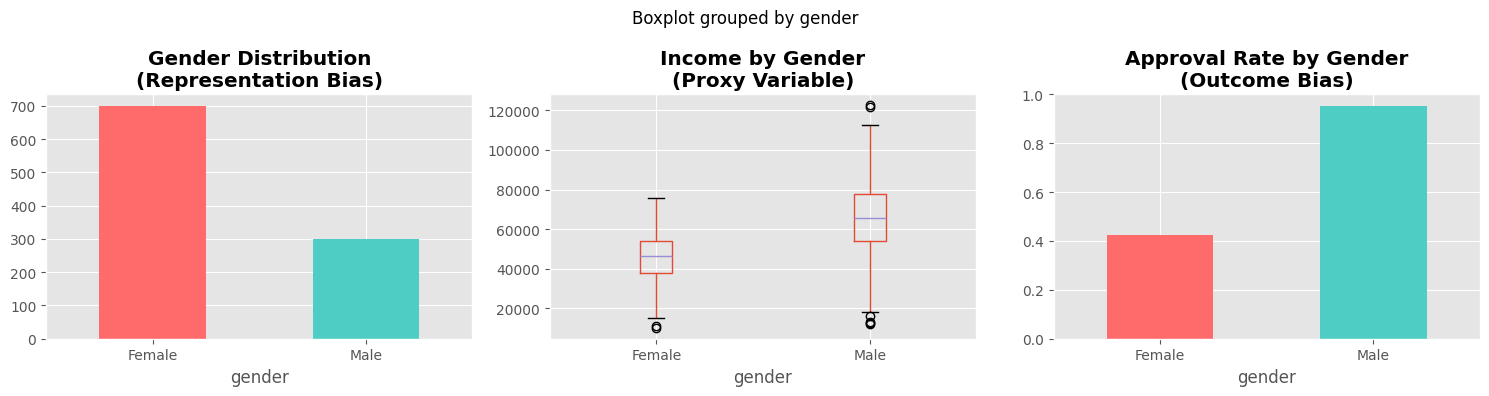

In [3]:
# Visualize the biases
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Gender distribution
df['gender'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Gender Distribution\n(Representation Bias)', fontweight='bold')
axes[0].set_xticklabels(['Female', 'Male'], rotation=0)

# Income by gender
df.boxplot(column='income', by='gender', ax=axes[1])
axes[1].set_title('Income by Gender\n(Proxy Variable)', fontweight='bold')
axes[1].set_xticklabels(['Female', 'Male'])

# Approval rates
df.groupby('gender')['approved'].mean().plot(kind='bar', ax=axes[2], color=['#FF6B6B', '#4ECDC4'])
axes[2].set_title('Approval Rate by Gender\n(Outcome Bias)', fontweight='bold')
axes[2].set_xticklabels(['Female', 'Male'], rotation=0)
axes[2].set_ylim([0, 1])

plt.tight_layout()
plt.show()

## Part 2: Bias Detection

Use BiasDetector to systematically identify all biases.

In [51]:
# Initialize detector

import sys
from pathlib import Path

# Dynamically add the project root to sys.path
# This assumes your notebook is inside a subfolder like 'pipeline_module'
# If your notebook is in the root, remove one .parent
project_root = Path.cwd().parent.parent 
sys.path.append(str(project_root))

\
print("✅ BiasDetector imported successfully!" & project_root)

TypeError: unsupported operand type(s) for &: 'str' and 'WindowsPath'